<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [118]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [119]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [120]:
len(df)

156

In [122]:
# уберем строку с пустыми значениями в Freedom и Positive affect

a = df[df['Country (region)'] != 'Qatar']
a.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

In [ ]:
# Нормального распределения у столбцов нет. Это равномерное распределение.

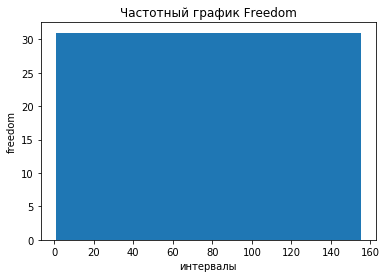

In [123]:
plt.hist(a['Freedom'],5)

plt.grid = (True)
plt.xlabel('интервалы')
plt.ylabel('freedom')
plt.title('Частотный график Freedom')
plt.show()


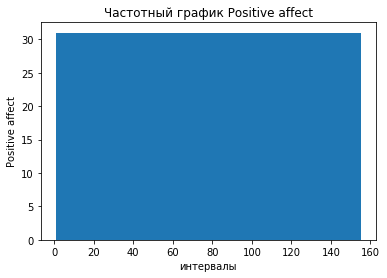

In [124]:
plt.hist(a['Positive affect'],5)

plt.xlabel('интервалы')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect')
plt.grid = (True)
plt.show()


Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [136]:
# найдем медиану
statistics.median(a['Freedom'])

78.0

In [135]:
#найдем математическое ожидание.
statistics.mean(a.Freedom)

78.0

In [129]:
# Найдем стандартное отклонение
statistics.pstdev(a['Freedom'])

44.74371464239419

In [130]:
# найдем дисперсию
statistics.pvariance(a.Freedom)

2002.0

In [131]:
# найдем минимум
a.Freedom.min()

1.0

In [132]:
# найдем максимум
a.Freedom.max()

155.0

In [21]:
# найдем выбросы: пустые значения. Т.к. это равномерное распределение, то не должно быть выбросов, кроме пустых значений.
df.Freedom.isnull().sum()
# посмотрим, что это за значение. В начале мы сформировали даные без этого столбца
df[pd.isnull(df.Freedom)]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [137]:
# найдем размах

print(a.Freedom.max() - a.Freedom.min())

154.0


In [138]:
# найдем моду
statistics.mode(a['Freedom'])

StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

In [0]:
# моду нельзя найти потому что у нас в колонке Freedom нет повторяющихся значений

In [139]:
# проверим предположение об уникальности значений в столбце
len(a['Freedom'].unique())

155

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


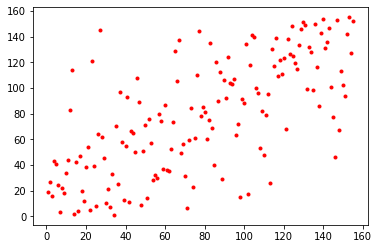

In [114]:
# посмотрим корреляцию между Freedom и positive affect математически и графически, посчитаем коэффициент Пирсона
from scipy.stats import pearsonr

x = a['Freedom']
y = a['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.', c = 'red')
print('Коэффициент корреляции Пирсона:', corr)

# Данные показывают наличие прямой корреляции. т.е. с ростом одной переменной, растет и другая.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [115]:
from sklearn import preprocessing
freedom = a.Freedom
freedom_1 = freedom - statistics.mean(freedom)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))


[-1.]
[1.]


In [112]:
statistics.mean(a.Freedom)

78.0

Построить матрицу корреляций для всех колонок таблицы

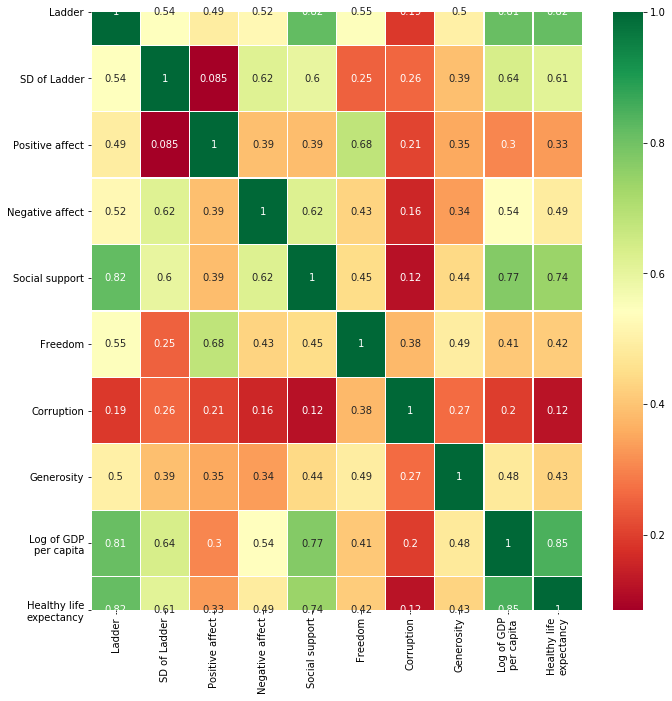

In [80]:
import seaborn as sns
sns.heatmap(a.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,11)
plt.show()


Загрузить таблицу цен на авокадо: 

In [87]:
import io
import requests
#url="http://yustiks.ru/avocado.csv"
df_1=pd.read_csv('avocado.csv')
df_1[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

In [151]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


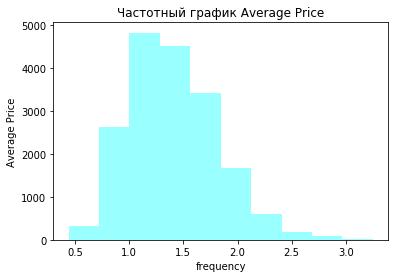

In [109]:
plt.hist(df_1['AveragePrice'], 10, facecolor='aqua',alpha=0.4)

plt.xlabel('frequency')
plt.ylabel('Average Price')
plt.title('Частотный график Average Price')
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

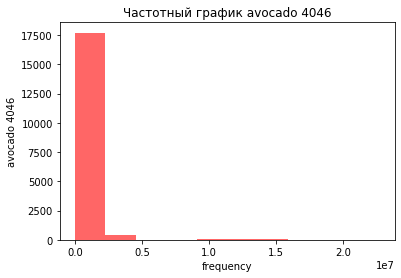

In [162]:
# корреляция между Average Price и колонкой 4046
plt.hist(df_1['4046'], 10, facecolor='red',alpha=0.6)
plt.xlabel('frequency')
plt.ylabel('avocado 4046')
plt.title('Частотный график avocado 4046')
plt.show()

Коэффициент корреляции Пирсона: -0.20831704848788474


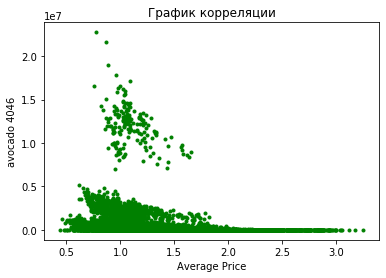

In [158]:
corr, p_value = pearsonr(df_1['AveragePrice'], df_1['4046'])
plt.scatter(df_1['AveragePrice'],df_1['4046'], marker='.', c = 'g')
plt.xlabel('Average Price')
plt.ylabel('avocado 4046')
plt.title('График корреляции')

print('Коэффициент корреляции Пирсона:', corr)
plt.show()

# коэффициент корреляции небольшой и отрицательный, корреляция обратная. Связь средней силы, чем больше цена, тем меньше покупают авокадо 4046.

Коэффициент корреляции Пирсона: -0.17292777250933536


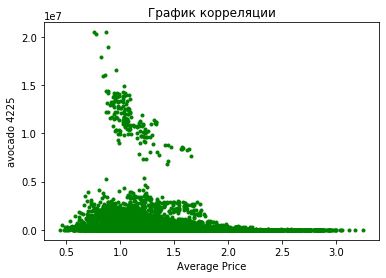

In [159]:
# корреляция между Average Price и колонкой 4225
corr, p_value = pearsonr(df_1['AveragePrice'], df_1['4225'])
plt.scatter(df_1['AveragePrice'],df_1['4225'], marker='.', c = 'g')
plt.xlabel('Average Price')
plt.ylabel('avocado 4225')
plt.title('График корреляции')

print('Коэффициент корреляции Пирсона:', corr)
plt.show()

# коэффициент корреляции небольшой и отрицательный, корреляция обратная. Связь средней силы, чем больше цена, тем меньше покупают авокадо 4225.

Коэффициент корреляции Пирсона: -0.1794459839797562


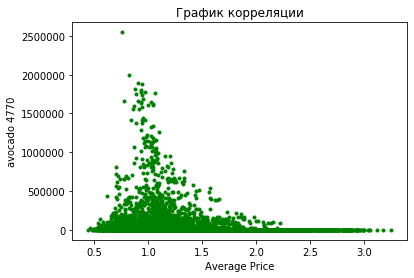

In [160]:
# корреляция между Average Price и колонкой 4770
corr, p_value = pearsonr(df_1['AveragePrice'], df_1['4770'])
plt.scatter(df_1['AveragePrice'],df_1['4770'], marker='.', c = 'g')
plt.xlabel('Average Price')
plt.ylabel('avocado 4770')
plt.title('График корреляции')

print('Коэффициент корреляции Пирсона:', corr)
plt.show()

# коэффициент корреляции небольшой и отрицательный, корреляция обратная. Связь средней силы, чем больше цена, тем меньше покупают авокадо 4770.